In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/alextodorov/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/z6/g8fs0ydj3cd9bc47qb_c0n_80000gn/T/matplotlib-y5a9x4qx because there was an issue with the default path (/Users/alextodorov/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("testing_data.csv")

In [7]:
def plot_stock_rsi_ma(df):
    # Check if index is datetime, else convert Date column and set as index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Plot Close Price and SMA (or Absolute_MA if you prefer)
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.plot(df.index, df['SMA'], label='SMA', color='orange', linestyle='--')

    # Plot Buy signals if exist
    buy_signals = df[df['Buy_signal'] == 1]
    if not buy_signals.empty:
        ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='Buy Signal')

    ax1.set_title('Close Price and Simple Moving Average')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Plot RSI
    ax2.plot(df.index, df['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax2.fill_between(df.index, 70, 100, color='red', alpha=0.1)
    ax2.fill_between(df.index, 0, 30, color='green', alpha=0.1)
    ax2.set_title('Relative Strength Index (RSI)')
    ax2.set_ylabel('RSI Value')
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper left')
    ax2.grid(True)

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()


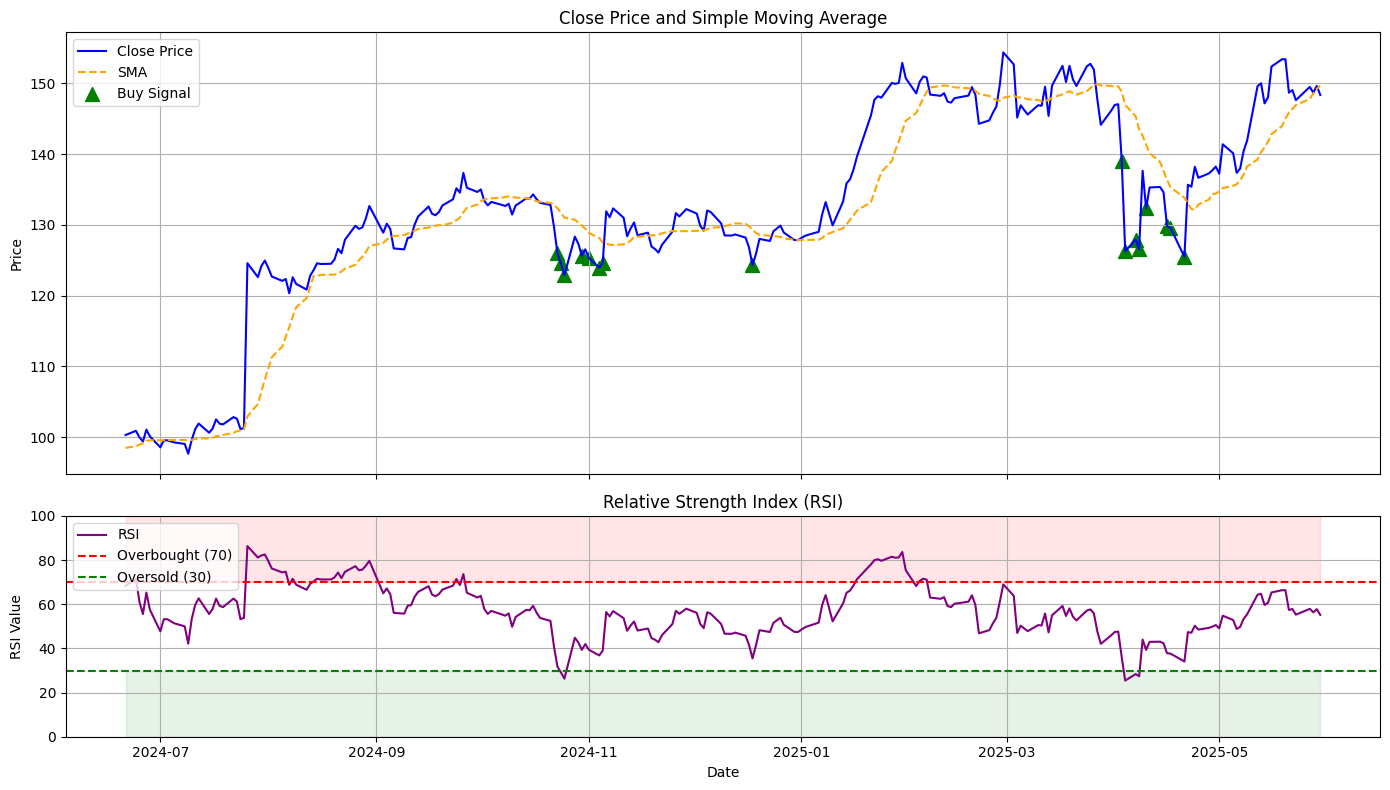

In [8]:
plot_stock_rsi_ma(data)